# FUM Computer Vision - Session 01

Visit the [course repository on Github](https://github.com/alifarrokh/FUM-ComputerVision) to get access to other sessions.

### Load Required Packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Download Images

In [11]:
!wget -q "https://picsum.photos/id/103/300" -O img1.jpg
!wget -q "https://picsum.photos/id/106/300" -O img2.jpg
!wget -q "https://picsum.photos/id/1069/300" -O img3.jpg

In [12]:
!ls *.jpg

img1.jpg  img2.jpg  img3.jpg


<class 'numpy.ndarray'>
(300, 300, 3)


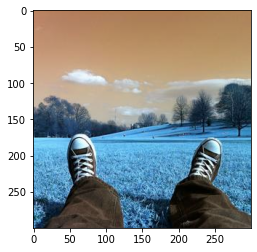

In [13]:
img1 = cv2.imread('img1.jpg')
print(type(img1))
print(img1.shape)
plt.imshow(img1)
plt.show()

### Utils

In [14]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')

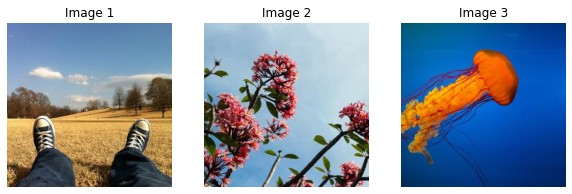

In [15]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
img3 = cv2.imread('img3.jpg')
imshow(img1, img2, img3, title=['Image 1', 'Image 2', 'Image 3'])

### Loading the Images

- Use `cv2.imread?` to get information about a specific method.
- cv2.imread returns a numpy array.
- cv2 uses bgr channel ordering by default.


```
image = cv2.imread(img, color_flag) -> ndarray

Color Flags:
cv2.IMREAD_COLOR       # default
cv2.IMREAD_GRAYSCALE
cv2.IMREAD_UNCHANGED
```

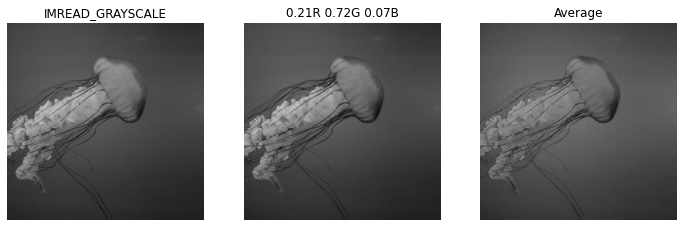

In [16]:
img1 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)

temp = cv2.imread('img3.jpg').astype('float32')
b, g, r = cv2.split(temp)

img2 = (0.21*r + 0.72*g + 0.07*b).astype('uint8')
img3 = ((r + g + b) / 3.0).astype('uint8')

imshow(img1, img2, img3, title=['IMREAD_GRAYSCALE', '0.21R 0.72G 0.07B', 'Average'], figsize=12)

Image: (300, 300, 3)
Channnel: (300, 300)


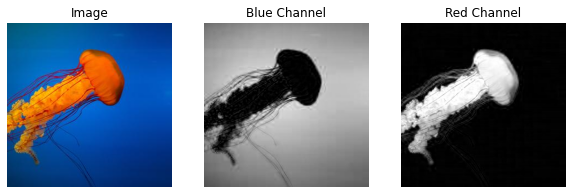

In [17]:
img = cv2.imread('img3.jpg')
b, g, r = cv2.split(img)

print(f'Image: {img.shape}')
print(f'Channnel: {b.shape}')

imshow(img, b, r, title=['Image', 'Blue Channel', 'Red Channel'])

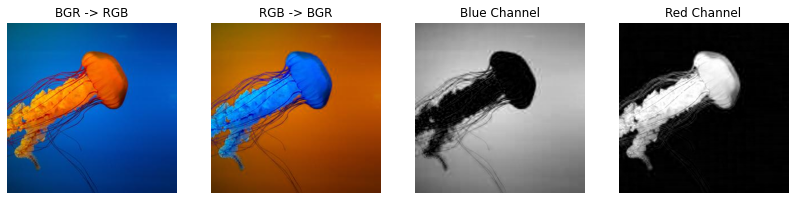

In [18]:
img_bgr = cv2.imread('img3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img_rgb)
titles=['BGR -> RGB', 'RGB -> BGR', 'Blue Channel', 'Red Channel']
imshow(img_bgr, img_rgb, b, r, title=titles, figsize=14)

### Using Array Slicing

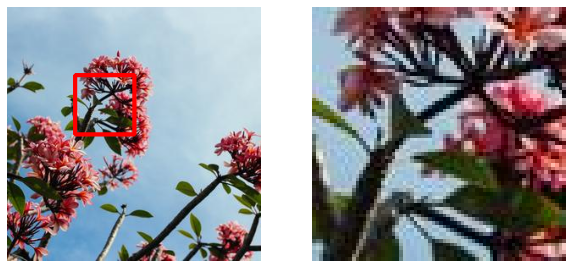

In [19]:
img = cv2.imread('img2.jpg')

start = (80, 80)
end = (150, 150)

img2 = img.copy()[start[0]:end[0], start[1]:end[1]]
img = cv2.rectangle(img, start, end, (0, 0, 255), 3)

imshow(img, img2)

### Intensity Quantization

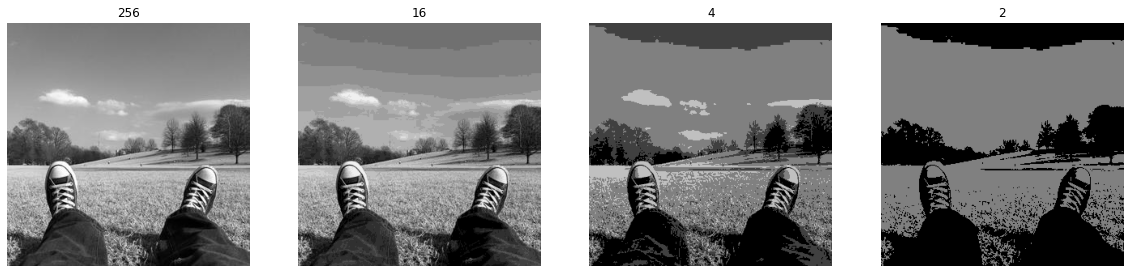

In [20]:
def quantize_simulation(image, n_bits):
    coeff = 2**8 // 2**n_bits
    return (image // coeff) * coeff


img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img4bit = quantize_simulation(img, 4)
img2bit = quantize_simulation(img, 2)
img1bit = quantize_simulation(img, 1)

titles = [
    len(np.unique(img)),
    len(np.unique(img4bit)),
    len(np.unique(img2bit)),
    len(np.unique(img1bit)),
]
imshow(img, img4bit, img2bit, img1bit, title=titles, figsize=20)

### Interpolation

Interpolation Modes:
```
cv2.INTER_CUBIC
cv2.INTER_LINEAR
```

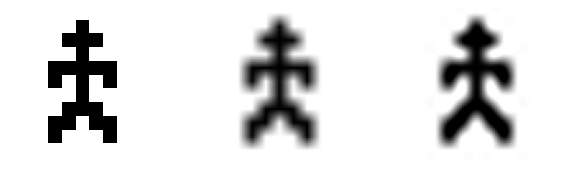

In [21]:
!wget -q "https://i.postimg.cc/sX4rzCbf/man3.png" -O interpolation.png

img = cv2.imread('interpolation.png', cv2.IMREAD_GRAYSCALE)

img100linear = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img100cubic = cv2.resize(img, (100, 100), interpolation=cv2.INTER_CUBIC)

imshow(img, img100linear, img100cubic)

### Pixel Arithmetic

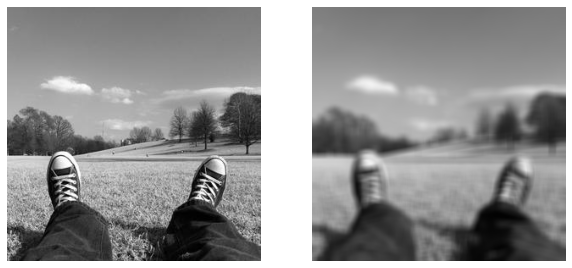

In [22]:
# Average
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
avg = np.zeros_like(img, dtype='uint8')

kernel_size = 5
size = kernel_size - 1

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        x_start = max(i-size, 0)
        x_end = min(i+size, img.shape[0]-1)
        y_start = max(j-size, 0)
        y_end = min(j+size, img.shape[1]-1)
        
        value = img[x_start:x_end+1, y_start:y_end+1].mean()
        avg[i, j] = value

imshow(img, avg)

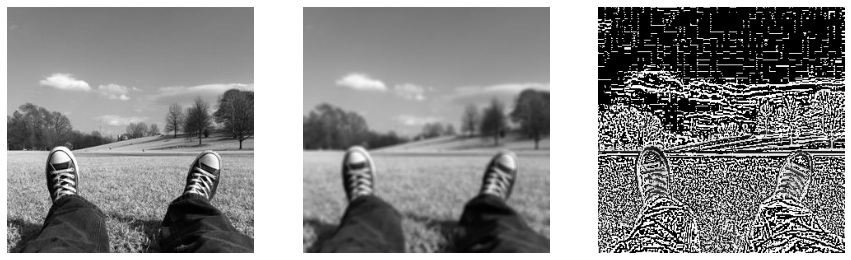

In [23]:
# Subtraction
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5, 5), 3)
diff = img - blur
imshow(img, blur, diff, figsize=15)

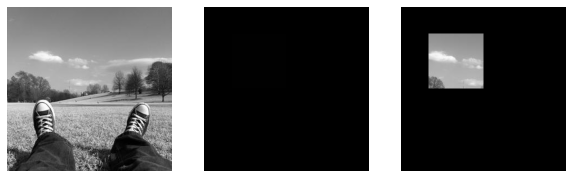

In [24]:
# Masking
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
mask = np.zeros_like(img, dtype='uint8')
mask[50:150, 50:150] = 1
img_masked = img * mask
imshow(img, mask, img_masked)